In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

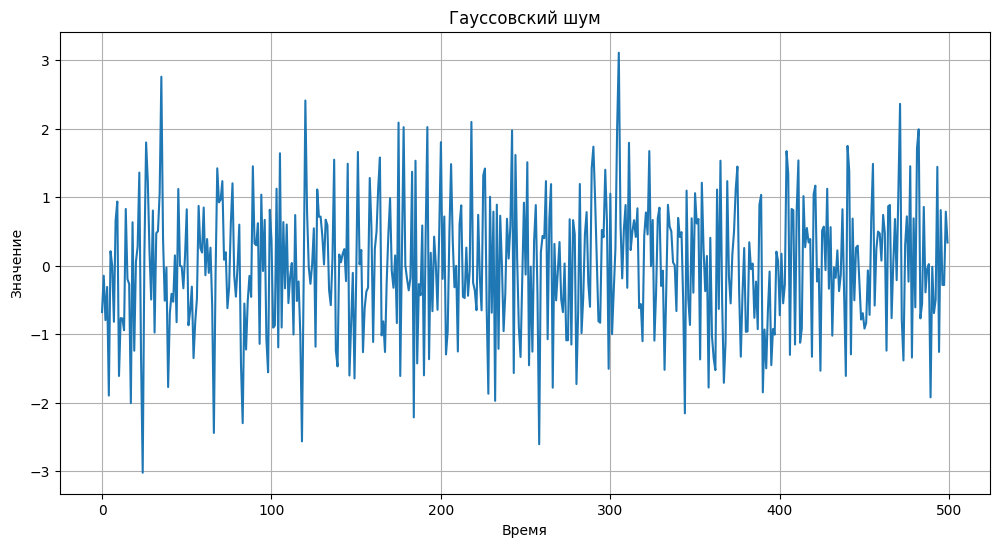

-17.360035806204273
5.210336735526589e-30
{'1%': np.float64(-3.4435494520411605), '5%': np.float64(-2.8673612117611267), '10%': np.float64(-2.5698704830567247)}
Ряд стационарный


In [15]:
# Задание 1
# а)
n_points = 500
gaussian_noise = np.random.normal(0, 1, n_points)

# б)
plt.figure(figsize=(12, 6))
plt.plot(gaussian_noise)
plt.title('Гауссовский шум')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

# в)
result_adfuller = adfuller(gaussian_noise)
adfuller_statistic = result_adfuller[0]
p_value = result_adfuller[1]
critical_values = result_adfuller[4]
print(adfuller_statistic)
print(p_value)
print(critical_values)

if p_value < 0.05:
    print('Ряд стационарный')
else:
    print('Ряд нестационарный')

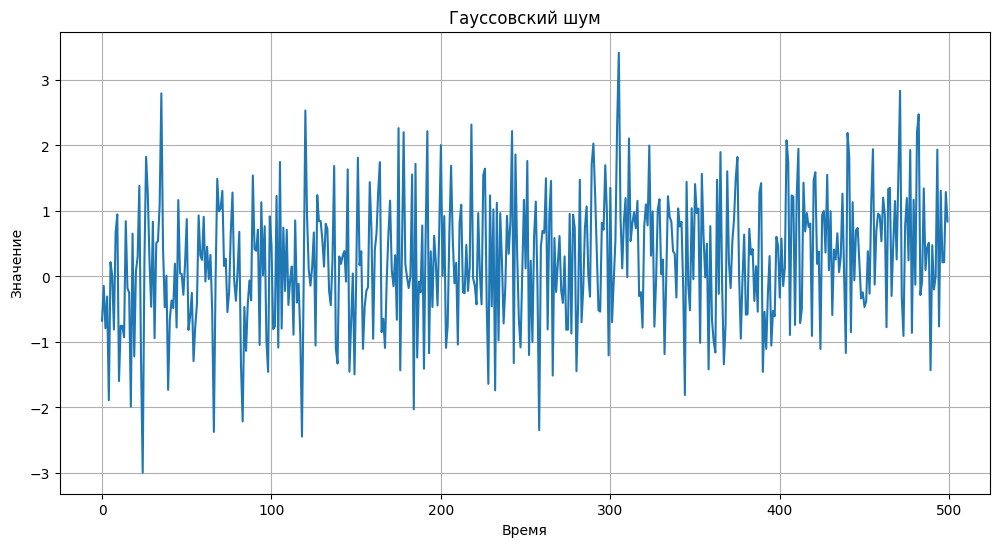

-22.183933915413803
0.0
{'1%': np.float64(-3.4435228622952065), '5%': np.float64(-2.867349510566146), '10%': np.float64(-2.569864247011056)}
Ряд стационарный


In [16]:
# Задание 2
# а)
x = np.arange(n_points)
trend = 0.001 * x
gaussian_noise_with_trend = gaussian_noise + trend

# б)
plt.figure(figsize=(12, 6))
plt.plot(gaussian_noise_with_trend)
plt.title('Гауссовский шум')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

# в)
result_adfuller_with_trend = adfuller(gaussian_noise_with_trend)
adfuller_statistic_trend = result_adfuller_with_trend[0]
p_value_trend = result_adfuller_with_trend[1]
critical_values_trend = result_adfuller_with_trend[4]
print(adfuller_statistic_trend)
print(p_value_trend)
print(critical_values_trend)

if p_value_trend < 0.05:
    print('Ряд стационарный')
else:
    print('Ряд нестационарный')

In [36]:
# Задание 3

data = pd.read_csv('passengers.csv')
data = data['#Passengers']

# а)
n = len(data)
part_size = n // 3

parts = []
means = []
variances = []

for i in range(3):
    start_idx = i * part_size
    if i == 2:
        end_idx = n
    else:
        end_idx = (i + 1) * part_size
    
    part = data[start_idx:end_idx]
    parts.append(part)
    
    mean_val = np.mean(part)
    var_val = np.var(part)
    
    means.append(mean_val)
    variances.append(var_val)
    
    print(f"Часть {i+1}: среднее = {mean_val:.2f}, дисперсия = {var_val:.2f}")

# б)
mean_range = max(means) - min(means)
var_range = max(variances) - min(variances)

if mean_range > np.mean(means) * 0.1 or var_range > np.mean(variances) * 0.1:
    print("Ряд нестационарный")
else:
    print("Ряд стационарный")

print("========================================\n")

# в)
data_log = np.log(data)

parts_log = []
means_log = []
variances_log = []

for i in range(3):
    start_idx = i * part_size
    if i == 2:
        end_idx = n
    else:
        end_idx = (i + 1) * part_size
    
    part_log = data_log[start_idx:end_idx]
    parts_log.append(part_log)
    
    mean_val_log = np.mean(part_log)
    var_val_log = np.var(part_log)
    
    means_log.append(mean_val_log)
    variances_log.append(var_val_log)
    
    print(f"Часть {i+1}: среднее = {mean_val_log:.4f}, дисперсия = {var_val_log:.4f}")

# г)
mean_range_log = max(means_log) - min(means_log)
var_range_log = max(variances_log) - min(variances_log)

if mean_range_log > np.mean(means_log) * 0.1 or var_range_log > np.mean(varvariances_logiances) * 0.1:
    print("Ряд нестационарный")
else:
    print("Ряд стационарный")

print("========================================\n")

# д)
result_adfuller_original = adfuller(data)
adfuller_statistic_original = result_adfuller_original[0]
p_value_original = result_adfuller_original[1]
critical_values_original = result_adfuller_original[4]
print(adfuller_statistic_original)
print(p_value_original)
print(critical_values_original)

if p_value_original < 0.05:
    print('Ряд стационарный')
else:
    print('Ряд нестационарный')

print("========================================\n")

# д)
result_adfuller_log = adfuller(data_log)
adfuller_statistic_log = result_adfuller_log[0]
p_value_log = result_adfuller_log[1]
critical_values_log = result_adfuller_log[4]
print(adfuller_statistic_log)
print(p_value_log)
print(critical_values_log)

if p_value_log < 0.05:
    print('Ряд стационарный')
else:
    print('Ряд нестационарный')

Часть 1: среднее = 158.38, дисперсия = 1071.86
Часть 2: среднее = 269.04, дисперсия = 3041.29
Часть 3: среднее = 413.48, дисперсия = 6033.62
Ряд нестационарный

Часть 1: среднее = 5.0439, дисперсия = 0.0420
Часть 2: среднее = 5.5747, дисперсия = 0.0397
Часть 3: среднее = 6.0079, дисперсия = 0.0327
Ряд нестационарный

0.8153688792060482
0.991880243437641
{'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
Ряд нестационарный

-1.7170170891069607
0.42236677477039125
{'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
Ряд нестационарный


In [39]:
# Задание 4
result_adfuller_original_c = adfuller(data, regression='n')
adfuller_statistic_original_c = result_adfuller_original_c[0]
p_value_original_c = result_adfuller_original_c[1]
critical_values_original_c = result_adfuller_original_c[4]
print(adfuller_statistic_original_c)
print(p_value_original_c)
print(critical_values_original_c)

if p_value_original_c < 0.05:
    print('Ряд стационарный')
else:
    print('Ряд нестационарный')

print("========================================\n")

result_adfuller_original_ct = adfuller(data, regression='ct')
adfuller_statistic_original_ct = result_adfuller_original_ct[0]
p_value_original_ct = result_adfuller_original_ct[1]
critical_values_original_ct = result_adfuller_original_ct[4]
print(adfuller_statistic_original_ct)
print(p_value_original_ct)
print(critical_values_original_ct)

if p_value_original_ct < 0.05:
    print('Ряд стационарный')
else:
    print('Ряд нестационарный')

print("========================================\n")

result_adfuller_original_ctt = adfuller(data, regression='ctt')
adfuller_statistic_original_ctt = result_adfuller_original_ctt[0]
p_value_original_ctt = result_adfuller_original_ctt[1]
critical_values_original_ctt = result_adfuller_original_ctt[4]
print(adfuller_statistic_original_ctt)
print(p_value_original_ctt)
print(critical_values_original_ctt)

if p_value_original_ctt < 0.05:
    print('Ряд стационарный')
else:
    print('Ряд нестационарный')

print("========================================\n")

result_adfuller_original_c = adfuller(data_log, regression='n')
adfuller_statistic_original_c = result_adfuller_original_c[0]
p_value_original_c = result_adfuller_original_c[1]
critical_values_original_c = result_adfuller_original_c[4]
print(adfuller_statistic_original_c)
print(p_value_original_c)
print(critical_values_original_c)

if p_value_original_c < 0.05:
    print('Ряд стационарный')
else:
    print('Ряд нестационарный')

print("========================================\n")

result_adfuller_original_ct = adfuller(data_log, regression='ct')
adfuller_statistic_original_ct = result_adfuller_original_ct[0]
p_value_original_ct = result_adfuller_original_ct[1]
critical_values_original_ct = result_adfuller_original_ct[4]
print(adfuller_statistic_original_ct)
print(p_value_original_ct)
print(critical_values_original_ct)

if p_value_original_ct < 0.05:
    print('Ряд стационарный')
else:
    print('Ряд нестационарный')

print("========================================\n")

result_adfuller_original_ctt = adfuller(data_log, regression='ctt')
adfuller_statistic_original_ctt = result_adfuller_original_ctt[0]
p_value_original_ctt = result_adfuller_original_ctt[1]
critical_values_original_ctt = result_adfuller_original_ctt[4]
print(adfuller_statistic_original_ctt)
print(p_value_original_ctt)
print(critical_values_original_ctt)

if p_value_original_ctt < 0.05:
    print('Ряд стационарный')
else:
    print('Ряд нестационарный')

2.390601734351225
0.9971802685434735
{'1%': np.float64(-2.583153076923077), '5%': np.float64(-1.9432510546199364), '10%': np.float64(-1.614925969959035)}
Ряд нестационарный

-2.1007818138446686
0.5456589343124556
{'1%': np.float64(-4.030152423759672), '5%': np.float64(-3.444817634956759), '10%': np.float64(-3.1471816659080565)}
Ряд нестационарный

-3.23367792264355
0.19594187397034601
{'1%': np.float64(-4.462541514337733), '5%': np.float64(-3.8786113536640876), '10%': np.float64(-3.5817528944014563)}
Ряд нестационарный

2.483278017623503
0.9979972814466732
{'1%': np.float64(-2.583153076923077), '5%': np.float64(-1.9432510546199364), '10%': np.float64(-1.614925969959035)}
Ряд нестационарный

-2.1470303080241493
0.5196810243754195
{'1%': np.float64(-4.030152423759672), '5%': np.float64(-3.444817634956759), '10%': np.float64(-3.1471816659080565)}
Ряд нестационарный

-3.218750866505302
0.20154707099825087
{'1%': np.float64(-4.462541514337733), '5%': np.float64(-3.8786113536640876), '10%': 